<a href="https://colab.research.google.com/github/Manya123-max/Deep-Learning-Algorithms-/blob/main/Deep9_LSTM_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, SpatialDropout1D
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 1. Load IMDb dataset (already preprocessed into integer sequences)
max_features = 10000 # Top 10,000 most frequent words
maxlen = 200 # Maximum number of words to consider in each review
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

"""IMDb dataset, which contains movie reviews preprocessed into integer sequences. Each integer
represents a unique word in the dataset's vocabulary.
Limit the vocabulary size to the top 10,000 most frequent words using num_words=max_features.
Sequences are padded to a maximum length of 200 words using pad_sequences().
This ensures all input sequences are of the same length."""

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (25000, 200)
x_test shape: (25000, 200)


"IMDb dataset, which contains movie reviews preprocessed into integer sequences. Each integer\nrepresents a unique word in the dataset's vocabulary.\nLimit the vocabulary size to the top 10,000 most frequent words using num_words=max_features.\nSequences are padded to a maximum length of 200 words using pad_sequences().\nThis ensures all input sequences are of the same length."

In [ ]:
model = Sequential()
# Embedding layer to represent words as vectors in a continuous space
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
# SpatialDropout1D helps to avoid overfitting
model.add(SpatialDropout1D(0.2))
# LSTM layer with 100 units (Build Stacked LSTM, add more layers)
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# Dense layer for output (binary classification: positive/negative)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 3. Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test),
verbose=2)


Epoch 1/10
391/391 - 168s - 428ms/step - accuracy: 0.7733 - loss: 0.4756 - val_accuracy: 0.8013 - val_loss: 0.4280
Epoch 2/10
391/391 - 158s - 404ms/step - accuracy: 0.8548 - loss: 0.3507 - val_accuracy: 0.8413 - val_loss: 0.3654
Epoch 3/10
391/391 - 200s - 511ms/step - accuracy: 0.8716 - loss: 0.3161 - val_accuracy: 0.7938 - val_loss: 0.4350
Epoch 4/10
391/391 - 202s - 517ms/step - accuracy: 0.8810 - loss: 0.2945 - val_accuracy: 0.8559 - val_loss: 0.3675
Epoch 5/10
391/391 - 202s - 516ms/step - accuracy: 0.8955 - loss: 0.2594 - val_accuracy: 0.8548 - val_loss: 0.3702
Epoch 6/10
391/391 - 201s - 514ms/step - accuracy: 0.9160 - loss: 0.2188 - val_accuracy: 0.8425 - val_loss: 0.4058
Epoch 7/10
391/391 - 203s - 519ms/step - accuracy: 0.9265 - loss: 0.1928 - val_accuracy: 0.8533 - val_loss: 0.3948
Epoch 8/10
391/391 - 201s - 515ms/step - accuracy: 0.9402 - loss: 0.1606 - val_accuracy: 0.8518 - val_loss: 0.4247
Epoch 9/10
391/391 - 202s - 518ms/step - accuracy: 0.9354 - loss: 0.1650 - val_a

In [ ]:
# 4. Evaluate the model
score, accuracy = model.evaluate(x_test, y_test, batch_size=64)
print(f"Test score: {score}")
print(f"Test accuracy: {accuracy}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - accuracy: 0.8371 - loss: 0.4719
Test score: 0.4567480981349945
Test accuracy: 0.8389999866485596


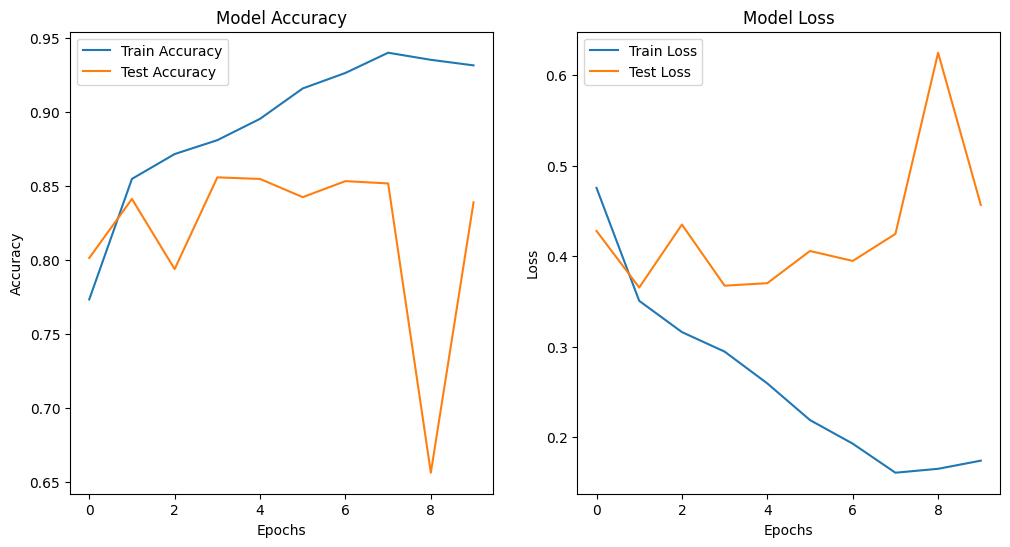

In [ ]:
import matplotlib.pyplot as plt
# 5. Plotting the training and validation accuracy/loss
plt.figure(figsize=(12, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Define predict_sentiment function first
def predict_sentiment(review):
 # Tokenize the input review
 review_seq = imdb.get_word_index()  # Assuming 'imdb' is defined and has get_word_index()
 review = review.lower().split()
 review = [review_seq[word] if word in review_seq else 0 for word in review]
 review = pad_sequences([review], maxlen=maxlen)  # Assuming 'maxlen' is defined

 # Predict sentiment (0: negative, 1: positive)
 prediction = model.predict(review)
 return "Positive" if prediction >= 0.5 else "Negative"

# Now you can call the function
sample_review = "I hate this movie! It was ugly."
print(f"Review: {sample_review}\nPrediction: {predict_sentiment(sample_review)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Review: I love this movie! It was fantastic.
Prediction: Negative
